**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo ( D )

---


Aluna(o): Arthur Gomes de Siqueira

---

Aluna(o): Ricardo Ataide de Oliveira Junior

---

#Especificação do problema : Lógica nebulosa

O setor de aluguéis de imóveis movimenta milhões por ano. Com a pandemia do coronavírus, esse setor tem sido forçado a se reinventar, uma vez que o contato direto (presencial) entre os interessados em alugar um imóvel e os corretores tem sido prejudicado. Você foi contratado por uma empresa do setor para projetar e implementar um sistema que faça sugestões para os clientes de imóveis que possam ser do seu interesse. 

Utilizando a base de dados [brazilian_houses_to_rent](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent), projete e implemente um sistema de recomendação, baseado em lógica nebulosa, que identifique os imóveis mais adequados às necessidades de um determinado cliente.

Nesse projeto, devem ser identificadas as variáveis de entrada nebulosas, as quais devem ter, no mínimo, três faixas valores. Também deve ser definida uma variável de saída que indique a probabilidade do cliente se interessar por um dado imóvel.



## O trabalho

O trabalho deve ser feito em grupos, conforme definido. Cada grupo deverá entregar apenas um produto final para ser avaliado pelo professor. Apesar do trabalho ser feito em grupos, a avaliação de cada aluno será feita individualmente.


**Recomendações:**

   O primeiro passo para resolver um problema é entendê-lo muito bem, considerar o contexto e fazer as abstrações necessárias. A seguir, para não "reinventar a roda" é preciso identificar como a comunidade resolveu o problema em questão, ou problemas parecidos, cuja solução possa ser mapeada para situação em análise. Desta forma, deve ser feito um estudo, o mais amplo possível sobre esse assunto. O próximo passo é o grupo se reunir e instanciar o modelo em estudo para o caso específico do problema a ser resolvido. Em paralelo, uma análise rigorosa deve ser feita na base de dados a fim de prepará-la para seu uso no modelo. Finalmente, com o modelo bem compreendido e instanciado e os dados devidamente preparados, a implementação do modelo pode ser feita.
   
    

## Divisão de papéis:

* **Analista de dados:** deverá ficar responsável por fazer uma "Análise Exploratória de Dados" (AED), analisando a base de dados fornecida e preparando-a para ser usada na solução do problema. Esta análise deve produzir diversos gráficos que pemitam uma visão geral do comportamento dos dados.

* **Engenheiro de conhecimento:** deverá produzir a solução para o problema, utilizando a técnica estudada, o modelo proposto pelo grupo e a base de dados preparada pelo analista de dados.



### Primeira etapa:

(1) **Notebook descrevendo detalhadamente o modelo:**
* Um modelo é uma representação abstrata do mundo. No nosso caso, o "mundo" é o contexto onde o problema se insere. Desta forma, deve ser analisado com cuidado o que deve e o que não deve ser considerado. Por exemplo, se a base de dados tem 30 colunas, todas elas deverão ser utilizadas na implementação? Algumas poderão ser desconsideradas? Por quê?
* Para utilizar a técnica em estudo, é preciso conhecê-la muito bem. Assim, nesta etapa, **deve ser feita uma descrição detalhada do problema e da técnica a ser utilizada.**
* Deve ser elaborado um modelo com base na técnica em estudo.
* O notebook, descrevendo o problema, a técnica em questão e o modelo elaborado deverá ser submetido na Plataforma Turing, até dia 20/10/2021. Os modelos serão discutidos com a turma no dia 21/10/2021.

### Segunda etapa:

(2) **Notebook contendo a Análise Exploratória dos Dados**

(3) **Notebook contendo a solução para o problema** 

(4) **Um vídeo explicando detalhadamente como a técnica estudada foi utilizada para resolver o problema proposto** . O vídeo NÃO deve ser uma apresentação do notebook nem deve apresentar detalhes de codificação. Deve trazer uma descrição do problema, do modelo utilizado e da solução desenvolvida, de preferência utilizando slides ou algo parecido. Preferencialmente, o grupo deve enviar um *link* para o local onde o vídeo está armazenado.


**Observação:** poderão ser utilizados códigos desenvolvidos pelo grupo e/ou códigos de terceiros. No caso de se usar códigos desenvolvidos por terceiros, o autor desses códigos deve ser devidamente referenciado e os códigos devem ser devidamente documentados (comentários no próprio código e fora dele).

Os produtos da segunda etapa deverão ser submetidos na Plataforma Turing até 25/10/2021.
 

# Video

Link: https://drive.google.com/file/d/12tFjCdG_vuxRFetQMe4V1TtEFVZbmjVn/view?usp=sharing

# Implementação

In [ ]:
import pandas as pd
#Monte o drive no colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [90]:
#Fazendo upload dos arquivos
from google.colab import files
uploaded = files.upload()

Saving houses_to_rent.csv to houses_to_rent.csv


In [91]:
import pandas as pd

In [98]:
#pegando a base de dados
df = pd.read_csv('houses_to_rent.csv')

In [99]:
#consertando a base de dados
df['hoa'].replace({'Sem info' : 'R$0', 'Incluso' : 'R$0'}, inplace = True)
df['animal'].replace({'not acept' : '0', 'acept' : '1'}, inplace = True)
df['furniture'].replace({'not furnished' : '0', 'furnished' : '1'}, inplace = True)
df['floor'].replace({'-' : '0'}, inplace = True)
df['property tax'].replace({'Incluso' : 'R$0'}, inplace = True)
df = df.rename({'Unnamed: 0' : 'id'}, axis = 1)
#df.drop(columns=["Unnamed: 0"], inplace = True)
df=df.replace('R','',regex=True)
df=df.replace(',','',regex=True)


In [100]:

#tirando o $
for column in df.columns[-5:]:
  df[column] = df[column].apply(lambda x : x[1:len(x)])

#mudando o tipo da coluna de object para int64
for column in df.columns:
  print(column, df[column].dtype)
  if df[column].dtype == "object":
    df[column] = df[column].astype("int64")

id int64
city int64
area int64
rooms int64
bathroom int64
parking spaces int64
floor object
animal object
furniture object
hoa object
rent amount object
property tax object
fire insurance object
total object


In [101]:
df

,id,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,4,1,19,1,1,0,0,0,0,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,1,0,420,1150,0,15,1585
6076,6076,1,84,2,2,1,16,0,1,768,2900,63,37,3768
6077,6077,0,48,1,1,0,13,1,0,250,950,42,13,1255
6078,6078,1,160,3,2,2,0,0,0,0,3500,250,53,3803


*   **Antecedentes** (entradas)

  - **Área** 

      - universo: tamanho da área do imóvel, em escala 10 a 1000?
      - conjunto nebuloso: pequeno, médio e grande.
  
 -  **Preço**

       - universo: valor total do condomínio, aluguel, imposto e seguro, em escala de R$1000 a R$17000?
       - conjunto nebuloso: baixo, médio, alto
       
*   **Consequentes** (saídas)
        
   - **Compra**
   
        - universo: a compra do imóvel, em escala de 0% a 100%.
        - conjunto nebuloso: baixa, média, alta.
        
*  **Regras**

  - SE a **Área** for grande OU o **Preço** for pequeno, ENTÃO a **Compra** será alta
  - SE a **Área** for pequena E o **Preço** for alto, ENTÃO a **Compra** será baixa
  - SE a **Área** for média E o **Preço** for médio, ENTÃO a **Compra** será média.

*  **Exemplo**

  - Área de um imóvel é 800
  - Valor total equivale a R$2000
  
  Recomendaria: 
  - Compra entre 70% e 85% 

A chance de compra fica entre 70% e 85% porque a área é considerada grande e o preço é médio tendo uma boa relevância, com isso, podemos considerar uma boa chance de compra.

## Implementacao com a API

In [ ]:
!pip install -U scikit-fuzzy

In [102]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [103]:
# Declaram dos objetos Antecedentes
area = ctrl.Antecedent(np.arange(10, 1001, 1), 'area') #variável area : 1 - 1000
total = ctrl.Antecedent(np.arange(1000, 17001, 1), 'total') #variavel total : 1000 - 17000
rooms = ctrl.Antecedent(np.arange(1, 9, 1), 'rooms') #variável rooms : 1 - 8
floor = ctrl.Antecedent(np.arange(1, 100, 1), 'floor') #variável floor : 1 - 99
bathroom = ctrl.Antecedent(np.arange(1, 8, 1), 'bathroom') #variavel bathroom : 1 - 7
parking_space = ctrl.Antecedent(np.arange(0, 9, 1), 'parking_space') #variável parking_space 0 - 8

#Declaram dos objetos Consequentes
compra = ctrl.Consequent(np.arange(0, 101, 1), 'compra') #variavel compra

In [104]:
# Inserção de valores para função de auto-pertinência, entao ele gera automaticamente os valores

rooms.automf(3)
bathroom.automf(3)
parking_space.automf(3)

In [105]:
# Inserção de valores para função de pertinência de forma manual, a gente customiza as variaveis

area['poor'] = fuzz.trimf(area.universe, [10, 10, 100])
area['average'] = fuzz.trimf(area.universe, [10, 100, 1000])
area['good'] = fuzz.trimf(area.universe, [100, 1000, 1000])

total['low'] = fuzz.trimf(total.universe, [1000, 1000, 5000])
total['medium'] = fuzz.trimf(total.universe, [1000, 5000, 17000])
total['high'] = fuzz.trimf(total.universe, [5000, 17000, 17000])

floor['low'] = fuzz.trimf(floor.universe, [1, 1, 10])
floor['medium'] = fuzz.trimf(floor.universe, [1, 10, 99])
floor['high'] = fuzz.trimf(floor.universe, [10, 99, 99])

compra['low'] = fuzz.trimf(compra.universe, [0, 0, 30])
compra['medium'] = fuzz.trimf(compra.universe, [0, 30, 100])
compra['high'] = fuzz.trimf(compra.universe, [30, 100, 100])

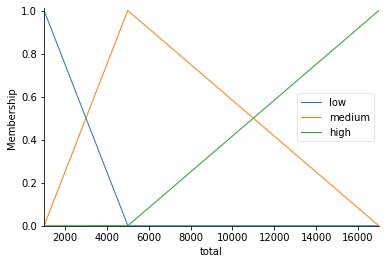

In [106]:
# Visualicao das nossas variaveis antecedentes e consequentes

total.view()

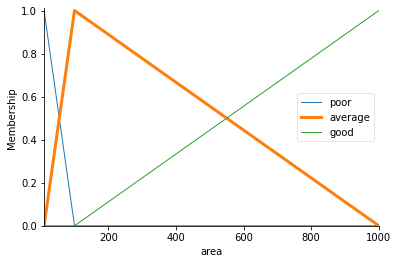

In [107]:
area['average'].view()

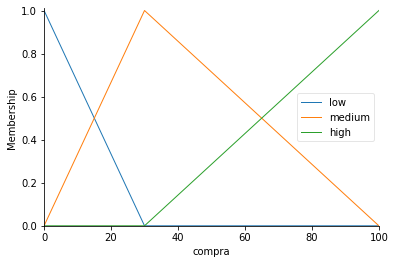

In [108]:
compra.view()

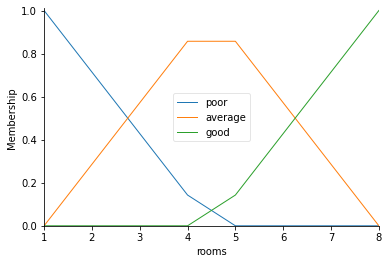

In [109]:
rooms.view()

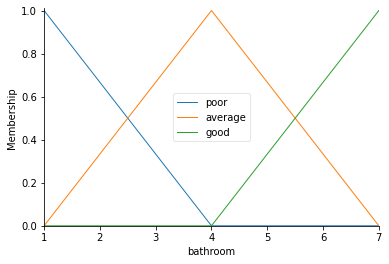

In [110]:
bathroom.view()

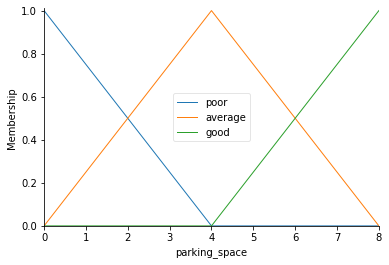

In [111]:
parking_space.view()

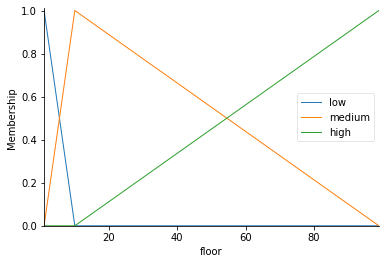

In [112]:
floor.view()

## Regras Nebulosas

  Tudo depende do interesse do comprador, então precisamos considerar cada coluna e o valor que o comprador escolheu:
  - Área
    - SE a **Área** do cliente for maior e igual a 1 e menor e igual a 100     
      - Regra: SE a **Área** for pequena ou media ou grande, ENTÃO a **Compra** será alta
    - SE a **Área** do cliente for maior e igual a 100 e menor e igual a 500     
      - Regra: SE a **Área** for media ou grande, ENTÃO a **Compra** será alta
      - Regra: SE a **Área** for pequena, ENTÃO a **Compra** será baixa
    - SE a **Área** do cliente for maior e igual a 500     
      - Regra: SE a **Área** for grande, ENTÃO a **Compra** será alta
      - Regra: SE a **Área** for pequena ou media, ENTÃO a **Compra** será baixa

  - Total
    - SE o **Total** do cliente for maior e igual a 1 e menor e igual a 4000     
      - Regra: SE o **Total** for pequena, ENTÃO a **Compra** será alta
      - Regra: SE o **Total** for media ou grande, ENTÃO a **Compra** será baixa
    - SE o **Total** do cliente for maior e igual a 4000 e menor e igual a 6000     
      - Regra: SE o **Total** for pequena ou média, ENTÃO a **Compra** será alta
      - Regra: SE o **Total** for alto, ENTÃO a **Compra** será baixa
    - SE o **Total** do cliente for maior e igual a 6000     
      - Regra: SE o **Total** for pequena, media ou alta, ENTÃO a **Compra** será alta

  - Bathroom
    - SE o **Bathroom** do cliente for maior e igual a 1 e menor e igual a 2     
      - Regra: SE o **Bathroom** for pequena ou media ou grande, ENTÃO a **Compra** será média
    - SE o **Bathroom** do cliente for maior e igual a 3 e menor e igual a 4     
      - Regra: SE o **Bathroom** for media ou grande, ENTÃO a **Compra** será média
    - SE a **Área** do cliente for maior e igual a 5     
      - Regra: SE o **Bathroom** for grande, ENTÃO a **Compra** será média
  
  - Parking Space
    - SE o **Parking Space** do cliente for maior e igual a 0 e menor e igual a 2     
      - Regra: SE o **Parking Space** for pequena ou media ou grande, ENTÃO a **Compra** será média
    - SE o **Parking Space** do cliente for maior e igual a 3 e menor e igual a 4     
      - Regra: SE o **Parking Space** for media ou grande, ENTÃO a **Compra** será média
    - SE a **Área** do cliente for maior e igual a 5     
      - Regra: SE o **Parking Space** for grande, ENTÃO a **Compra** será média
      
  - Floor
    - SE o **Floor** do cliente for maior e igual a 0 e menor e igual a 10     
      - Regra: SE o **Floor** for pequena, ENTÃO a **Compra** será média
    - SE o **Floor** do cliente for maior e igual a 10 e menor e igual a 60     
      - Regra: SE o **Floor** for media ou grande, ENTÃO a **Compra** será média
    - SE a **Área** do cliente for maior e igual a 60   
      - Regra: SE o **Floor** for grande, ENTÃO a **Compra** será média

In [113]:
#varios tipos de clientes com seus respectivos interesses
cliente1 = {
    'area': 200,
    'total': 3000,
    'rooms': 1,
    'bathroom' : 1,
    'parking_space' : 1,
    'animal' : 1,
    'city' : 1,
    'furniture' : 1,
    'floor': 1
}

cliente2 = {
    'area': 50,
    'total': 1000,
    'rooms': 3,
    'bathroom' : 2,
    'parking_space' : 1,
    'animal' : 0,
    'city' : 1,
    'furniture' : 1,
    'floor': 5
}

cliente3 = {
    'area': 300,
    'total': 10000,
    'rooms': 5,
    'bathroom' : 5,
    'parking_space' : 5,
    'animal' : 1,
    'city' : 1,
    'furniture' : 1,
    'floor': 15
}

cliente4 = {
    'area': 50,
    'total': 5000,
    'rooms': 2,
    'bathroom' : 1,
    'parking_space' : 2,
    'animal' : 0,
    'city' : 1,
    'furniture' : 0,
    'floor': 4
}

cliente5 = {
    'area': 100,
    'total': 2000,
    'rooms': 4,
    'bathroom' : 4,
    'parking_space' : 3,
    'animal' : 1,
    'city' : 0,
    'furniture' : 0,
    'floor': 10
}

cliente6 = {
    'area': 500,
    'total': 5000,
    'rooms': 4,
    'bathroom' : 4,
    'parking_space' : 4,
    'animal' : 1,
    'city' : 0,
    'furniture' : 0,
    'floor': 3
}

cliente7 = {
    'area': 400,
    'total': 3500,
    'rooms': 2,
    'bathroom' : 2,
    'parking_space' : 1,
    'animal' : 1,
    'city' : 1,
    'furniture' : 1,
    'floor': 7
}

cliente8 = {
    'area': 50,
    'total': 1000,
    'rooms': 1,
    'bathroom' : 1,
    'parking_space' : 1,
    'animal' : 0,
    'city' : 1,
    'furniture' : 0,
    'floor': 1
}

cliente9 = {
    'area': 400,
    'total': 3000,
    'rooms': 2,
    'bathroom' : 2,
    'parking_space' : 3,
    'animal' : 1,
    'city' : 1,
    'furniture' : 0,
    'floor': 5
}

cliente10 = {
    'area': 200,
    'total': 1000,
    'rooms': 1,
    'bathroom' : 1,
    'parking_space' : 0,
    'animal' : 1,
    'city' : 1,
    'furniture' : 1,
    'floor': 1
}

lista_de_clientes = []

lista_de_clientes.append(cliente1)
lista_de_clientes.append(cliente2)
lista_de_clientes.append(cliente3)
lista_de_clientes.append(cliente4)
lista_de_clientes.append(cliente5)
lista_de_clientes.append(cliente6)
lista_de_clientes.append(cliente7)
lista_de_clientes.append(cliente8)
lista_de_clientes.append(cliente9)
lista_de_clientes.append(cliente10)

In [120]:
#percorrendo cada cliente
for i, cliente in enumerate(lista_de_clientes):
  print("Teste com o cliente ", i + 1)

  #filtrando a base com valores que nao podem faltar de jeito nenhum
  filtered_df = df
  filtered_df = filtered_df[filtered_df['animal'].eq(cliente['animal'])]
  filtered_df = filtered_df[filtered_df['city'].eq(cliente['city'])]
  filtered_df = filtered_df[filtered_df['furniture'].eq(cliente['furniture'])]
  filtered_df

  #Criamos um sistema de controle nosso com as regras criadas
  comprando_ctrl = ctrl.ControlSystem(rules=None)  

  #Criando as regras estabelecidas por nos

  #criando regras para area
  if(1 <= cliente['area'] and cliente['area'] <= 100):
    rule1 = ctrl.Rule(area['poor'] | area['average'] | area['good'], compra['high'])
    comprando_ctrl.addrule(rule1)
  elif(100 <= cliente['area'] and cliente['area'] <= 500):
    rule1 = ctrl.Rule(area['average'] | area['good'], compra['high'])
    rule11 = ctrl.Rule(area['poor'], compra['low'])
    comprando_ctrl.addrule(rule1)
    comprando_ctrl.addrule(rule11)  
  elif(cliente['area'] >= 500):
    rule1 = ctrl.Rule(area['good'], compra['high'])
    rule11 = ctrl.Rule(area['poor'] | area['average'], compra['low'])
    comprando_ctrl.addrule(rule1)
    comprando_ctrl.addrule(rule11)

  #criando regras para total
  if(1 <= cliente['total'] and cliente['total'] <= 4000):
    rule2 = ctrl.Rule(total['low'], compra['high'])
    rule22 = ctrl.Rule(total['medium'] | total['high'], compra['low'])
    comprando_ctrl.addrule(rule2)
    comprando_ctrl.addrule(rule22)
  elif(4000 <= cliente['total'] and cliente['total'] <= 6000):
    rule2 = ctrl.Rule(total['low'] | total['medium'], compra['high'])
    rule22 = ctrl.Rule(total['high'], compra['low'])
    comprando_ctrl.addrule(rule2)
    comprando_ctrl.addrule(rule22)
  elif(cliente['total'] >= 6000):
    rule2 = ctrl.Rule(total['low'] | total['medium'] | total['high'], compra['high'])
    comprando_ctrl.addrule(rule2)

  #criando regras pro rooms
  if(1 <= cliente['rooms'] and cliente['rooms'] <= 2):
    rule4 = ctrl.Rule(rooms['poor'] | rooms['average'] | rooms['good'], compra['medium'])
  elif(3 <= cliente['rooms'] and cliente['rooms'] <= 4):
    rule4 = ctrl.Rule(rooms['average'] | rooms['good'], compra['medium'])
  elif(cliente['rooms'] >= 5):
    rule4 = ctrl.Rule(rooms['good'], compra['medium'])

  #criando regras pro bathroom
  if(1 <= cliente['bathroom'] and cliente['bathroom'] <= 2):
    rule5 = ctrl.Rule(bathroom['poor'] | bathroom['average'] | bathroom['good'], compra['medium'])
  elif(3 <= cliente['bathroom'] and cliente['bathroom'] <= 4):
    rule5 = ctrl.Rule(bathroom['average'] | bathroom['good'], compra['medium'])
  elif(cliente['bathroom'] >= 5):
    rule5 = ctrl.Rule(bathroom['good'], compra['medium'])
  
  #criando regras pro parking_space
  if(0 <= cliente['parking_space'] and cliente['parking_space'] <= 2):
    rule6 = ctrl.Rule(parking_space['poor'] | parking_space['average'] | parking_space['good'], compra['medium'])
  elif(3 <= cliente['parking_space'] and cliente['parking_space'] <= 4):
    rule6 = ctrl.Rule(parking_space['average'] | parking_space['good'], compra['medium'])
  elif(cliente['parking_space'] >= 5):
    rule6 = ctrl.Rule(parking_space['good'], compra['medium'])
  
  #criando regras pro floor
  if(0 <= cliente['floor'] and cliente['floor'] <= 10):
    rule7 = ctrl.Rule(floor['low'], compra['medium'])
  elif(10 <= cliente['floor'] and cliente['floor'] <= 60):
    rule7 = ctrl.Rule(floor['medium'], compra['medium'])
  elif(cliente['floor'] >= 60):
    rule7 = ctrl.Rule(floor['high'], compra['medium'])

  comprando_ctrl.addrule(rule4)
  comprando_ctrl.addrule(rule5)
  comprando_ctrl.addrule(rule6)
  comprando_ctrl.addrule(rule7)

  #Vamos simular o sistema de controle, criando um 'ControlSystemSimulation'.
  #Podemos com eles criar ambientes e entradas que poderiam acontecer
  #e com isso gerar resultados e testar nossa logicas Nebulosa.

  #Calcule os resultados por meio do sistema de controle
  comprando = ctrl.ControlSystemSimulation(comprando_ctrl)
  
  #variavel com as respostas
  res = []
  for linha_df in filtered_df.values:

    # Estabelecendo entradas do ControlSystem usando os rótulos de Antecedent com uma API Python
    comprando.input['area'] = linha_df[2]
    comprando.input['rooms'] = linha_df[3]
    comprando.input['bathroom'] = linha_df[4]
    comprando.input['parking_space'] = linha_df[5]
    comprando.input['floor'] = linha_df[6]
    comprando.input['total'] = linha_df[13]
    
    # Filtrar os números e computar os resultados
    comprando.compute()

    #adicionando nas respostas os valores encontrados
    res.append([comprando.output['compra'], linha_df])
    
  #ordena de melhor pra pior
  res.sort(key=lambda x: x[0], reverse = True)

  #imprime as 10 melhores opçoes encontradas
  print("Resultados: ")
  for aux, valor in enumerate(res):
    if(aux == 11):
      break
    print(valor)    

  print("Fim dos testes com o cliente ", i + 1)
  print("\n")


Teste com o cliente  1
Resultados: 
[53.930074352151486, array([1704,    1,  150,    2,    2,    1,    0,    1,    1,    0, 2175,
          0,   12, 2187])]
[53.85087152339456, array([1970,    1,   80,    2,    2,    1,    0,    1,    1,    0, 1600,
         25,   25, 1650])]
[53.804355573272694, array([  173,     1,   118,     3,     2,     2,     7,     1,     1,
        1880,  8500,   434,   108, 10920])]
[53.786447256488195, array([2566,    1,   95,    2,    2,    0,    1,    1,    1,  621, 1550,
         82,   20, 2273])]
[53.621457613880516, array([ 855,    1,  154,    3,    3,    2,   12,    1,    1, 1042, 2000,
          0,   26, 3068])]
[53.579805895713136, array([3861,    1,   84,    3,    2,    2,    7,    1,    1,  540, 2200,
         71,   28, 2839])]
[53.55944874203786, array([2408,    1,  100,    3,    2,    1,   15,    1,    1,  870, 1800,
        178,   23, 2871])]
[53.537676023473885, array([3489,    1,   68,    3,    2,    1,    3,    1,    1,  455, 1299,
          0

## Análise da complexidade

A complexidade de tempo e espaço vai ser igual a O(n), onde n é o tamanho da base, em si não é alto quando vamos resolver os problemas mas em big data a complexidade de tempo e espaço fica alto. Então precisamos reduzir. A complexidade do tempo é reduzida através da propriedade de recuperação consecutiva (C-R) e a complexidade do espaço é reduzida com blackboard systems(sistemas de quadro negro)

## Avaliação

Em questão de ser completa e otima, não são porque tudo depende das regras que estabelecemos porque as vezes a solução pode entregar um resultado que não seja a melhor possivel. Necessitando de mais ajuste de regras, mais implementação e uma melhor analise do problema.

## Outras soluções

Outra utilidade é a de modelar funções não lineares de complexidade arbitrária, possibilitando a criação de um sistema nebuloso que se combina com qualquer conjunto de dados de entrada-saída. Esse processo é feito facilmente através de técnicas adaptativas. 

https://www.marinha.mil.br/spolm/sites/www.marinha.mil.br.spolm/files/033.pdf

Outra solução seria desse artigo abaixo que tem a mesma proposta que esse trabalho proposto por nós, o objetivo do artigo é a seleção de terrenos para edificações comerciais na cidade do Rio de Janeiro, por meio do uso de técnicas de múltiplos critérios de tomada de decisão, com base no método: Lógica Fuzzy.

https://www.ime.unicamp.br/~cbsf4/Papers_IVCBSF/CBSF_2016_paper_56.pdf



## Observação

Mudamos o modelo para um modelo mais completo visto que poderiamos colocar mais detalhes em nossa implementação e considerar mais variaveis para ter um melhor resultado. 